<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/CL_BLOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

In [3]:
# Scrape Giroud player stats:
giroud_scrape_url = "https://understat.com/player/502"
page_connect = urlopen(giroud_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

giroud_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
giroud_season_wise_meta_df.insert(0, "Player", "Giroud")

In [4]:
giroud_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Giroud,Sub,17,4,29,750,5.070415806025267,0,1.1757991276681423,6,2020,Chelsea,1,0,4,5.070415806025267,5.245491370558739,1.7113372217863798
1,Giroud,Sub,18,8,39,1015,7.400897581130266,0,1.3883666470646858,8,2019,Chelsea,1,0,8,7.400897581130266,9.754190690815449,2.3567660972476006
2,Giroud,Sub,27,2,32,808,5.060872016474605,4,2.29118718765676,18,2018,Chelsea,1,0,2,5.060872016474605,7.711165012791753,2.782382659614086
3,Giroud,Sub,13,3,29,606,4.0543695986270905,1,2.1585368514060974,13,2017,Chelsea,0,0,3,4.0543695986270905,6.08300157636404,0.7594741173088551
4,Giroud,Sub,16,4,18,347,3.550343930721283,0,0.8545274585485458,7,2017,Arsenal,0,0,4,3.550343930721283,4.612789988517761,0.8849820233881474
5,Giroud,Sub,29,12,39,1170,6.9990871623158455,3,2.0118068866431713,17,2016,Arsenal,2,0,12,6.9990871623158455,9.583839835599065,1.8246372137218714
6,Giroud,FW,38,16,101,2411,14.503995144739747,6,5.762218959629536,36,2015,Arsenal,2,0,15,13.742826307192445,18.885235082358122,6.915774317458272
7,Giroud,Sub,27,14,70,1871,8.846344472840428,3,3.8601362351328135,29,2014,Arsenal,5,1,14,8.846344472840428,13.639880420640111,4.129246938973665


In [5]:
# Scrape Giroud shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

giroud_shots_df = pd.json_normalize(json.loads(json_data))
giroud_shots_df.insert(0, "Player", "Giroud")

In [6]:
giroud_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Giroud,14439,83,MissedShots,0.9569999694824218,0.710999984741211,0.05020691826939583,Olivier Giroud,h,502,OpenPlay,2014,LeftFoot,4755,Arsenal,Crystal Palace,2,1,2014-08-16 17:30:00,Alexis Sánchez,Pass
1,Giroud,14739,45,MissedShots,0.9540000152587891,0.59,0.28176572918891907,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Alex Oxlade-Chamberlain,Chipped
2,Giroud,14741,66,MissedShots,0.8030000305175782,0.4159999847412109,0.05226166173815727,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Jack Wilshere,Pass
3,Giroud,14742,68,SavedShot,0.8769999694824219,0.4179999923706055,0.06098354607820511,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,None,None
4,Giroud,14747,85,MissedShots,0.9159999847412109,0.45099998474121095,0.0761827901005745,Olivier Giroud,a,502,FromCorner,2014,Head,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Santiago Cazorla,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Giroud,416305,84,MissedShots,0.884000015258789,0.6079999923706054,0.06123775988817215,Olivier Giroud,h,502,OpenPlay,2020,LeftFoot,14747,Chelsea,Brighton,0,0,2021-04-20 19:00:00,Callum Hudson-Odoi,Cross
354,Giroud,416307,92,SavedShot,0.9,0.48400001525878905,0.09585259109735489,Olivier Giroud,h,502,SetPiece,2020,Head,14747,Chelsea,Brighton,0,0,2021-04-20 19:00:00,Reece James,Cross
355,Giroud,421514,68,MissedShots,0.805,0.555,0.04369828850030899,Olivier Giroud,h,502,OpenPlay,2020,LeftFoot,14790,Chelsea,Arsenal,0,1,2021-05-12 19:15:00,Mason Mount,BallRecovery
356,Giroud,421517,80,MissedShots,0.8919999694824219,0.48700000762939455,0.06329552084207535,Olivier Giroud,h,502,OpenPlay,2020,Head,14790,Chelsea,Arsenal,0,1,2021-05-12 19:15:00,Reece James,Cross


In [7]:
# Scrape Aguero player stats:
aguero_scrape_url = "https://understat.com/player/619"
page_connect = urlopen(aguero_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

aguero_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
aguero_season_wise_meta_df.insert(0, "Player", "Aguero")

In [8]:
aguero_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Aguero,FW,12,4,19,556,3.716518562287092,1,1.315659787505865,7,2020,Manchester City,0,0,3,2.1941808788105845,4.158569987863302,1.2831713519990444
1,Aguero,Sub,24,16,76,1462,15.557500325143337,3,2.9202088303864002,19,2019,Manchester City,1,0,14,13.274030677974224,16.878254003822803,2.644766173325479
2,Aguero,FW,33,21,118,2515,19.9491464830935,8,5.22924312017858,34,2018,Manchester City,3,0,19,18.426808904856443,28.70022003352642,8.100998356938362
3,Aguero,FW,25,21,95,1985,18.56861797720194,6,6.533229699358344,39,2017,Manchester City,2,0,17,15.523942567408085,23.707814872264862,7.512718818150461
4,Aguero,FW,31,20,139,2408,22.672585003077984,3,4.665906261652708,31,2016,Manchester City,4,1,16,18.866740860044956,25.35206551104784,5.0266740852966905
5,Aguero,Sub,30,24,119,2399,20.077213659882545,2,2.0287597198039293,27,2015,Manchester City,1,0,20,16.271369472146034,18.786789989098907,3.925958522595465
6,Aguero,Sub,33,26,148,2551,25.270159743726254,8,5.568922242149711,33,2014,Manchester City,4,0,21,20.70318364351988,27.805154908448458,6.878173082135618


In [9]:
# Scrape Aguero shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

aguero_shots_df = pd.json_normalize(json.loads(json_data))
aguero_shots_df.insert(0, "Player", "Aguero")

In [10]:
aguero_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Aguero,14553,91,Goal,0.9530000305175781,0.655,0.299155592918396,Sergio Agüero,a,619,OpenPlay,2014,RightFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,None,Rebound
1,Aguero,14552,91,SavedShot,0.9259999847412109,0.6809999847412109,0.0791548416018486,Sergio Agüero,a,619,OpenPlay,2014,LeftFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,Fernandinho,Pass
2,Aguero,14792,68,Goal,0.899000015258789,0.3240000152587891,0.35958579182624817,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4768,Manchester City,Liverpool,3,1,2014-08-25 20:00:00,Jesús Navas,Throughball
3,Aguero,14797,94,MissedShots,0.975999984741211,0.29200000762939454,0.064260333776474,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4768,Manchester City,Liverpool,3,1,2014-08-25 20:00:00,Fernandinho,Pass
4,Aguero,14996,65,BlockedShot,0.86,0.649000015258789,0.04344866797327995,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4770,Manchester City,Stoke,0,1,2014-08-30 15:00:00,Edin Dzeko,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Aguero,420218,50,SavedShot,0.7180000305175781,0.47200000762939454,0.013119838200509548,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14781,Manchester City,Chelsea,1,2,2021-05-08 16:30:00,Ferrán Torres,HeadPass
710,Aguero,424091,70,Goal,0.885,0.4640000152587891,0.4454546272754669,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,BallRecovery
711,Aguero,424092,75,Goal,0.8819999694824219,0.4979999923706055,0.1570996642112732,Sergio Agüero,h,619,OpenPlay,2020,Head,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,Cross
712,Aguero,424093,80,SavedShot,0.9259999847412109,0.29600000381469727,0.054634347558021545,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,None,None


Joint Season-wise data


In [11]:
season_wise_meta_df = giroud_season_wise_meta_df.append(aguero_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Giroud,Sub,17,4,29,750,5.070415806025267,0,1.1757991276681423,6,2020,Chelsea,1,0,4,5.070415806025267,5.245491370558739,1.7113372217863798
1,Giroud,Sub,18,8,39,1015,7.400897581130266,0,1.3883666470646858,8,2019,Chelsea,1,0,8,7.400897581130266,9.754190690815449,2.3567660972476006
2,Giroud,Sub,27,2,32,808,5.060872016474605,4,2.29118718765676,18,2018,Chelsea,1,0,2,5.060872016474605,7.711165012791753,2.782382659614086
3,Giroud,Sub,13,3,29,606,4.0543695986270905,1,2.1585368514060974,13,2017,Chelsea,0,0,3,4.0543695986270905,6.08300157636404,0.7594741173088551
4,Giroud,Sub,16,4,18,347,3.550343930721283,0,0.8545274585485458,7,2017,Arsenal,0,0,4,3.550343930721283,4.612789988517761,0.8849820233881474
5,Giroud,Sub,29,12,39,1170,6.9990871623158455,3,2.0118068866431713,17,2016,Arsenal,2,0,12,6.9990871623158455,9.583839835599065,1.8246372137218714
6,Giroud,FW,38,16,101,2411,14.503995144739747,6,5.762218959629536,36,2015,Arsenal,2,0,15,13.742826307192445,18.885235082358122,6.915774317458272
7,Giroud,Sub,27,14,70,1871,8.846344472840428,3,3.8601362351328135,29,2014,Arsenal,5,1,14,8.846344472840428,13.639880420640111,4.129246938973665
0,Aguero,FW,12,4,19,556,3.716518562287092,1,1.315659787505865,7,2020,Manchester City,0,0,3,2.1941808788105845,4.158569987863302,1.2831713519990444
1,Aguero,Sub,24,16,76,1462,15.557500325143337,3,2.9202088303864002,19,2019,Manchester City,1,0,14,13.274030677974224,16.878254003822803,2.644766173325479


Joint shots data

In [12]:
shots_df = giroud_shots_df.append(aguero_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Giroud,14439,83,MissedShots,0.9569999694824218,0.710999984741211,0.05020691826939583,Olivier Giroud,h,502,OpenPlay,2014,LeftFoot,4755,Arsenal,Crystal Palace,2,1,2014-08-16 17:30:00,Alexis Sánchez,Pass
1,Giroud,14739,45,MissedShots,0.9540000152587891,0.59,0.28176572918891907,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Alex Oxlade-Chamberlain,Chipped
2,Giroud,14741,66,MissedShots,0.8030000305175782,0.4159999847412109,0.05226166173815727,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Jack Wilshere,Pass
3,Giroud,14742,68,SavedShot,0.8769999694824219,0.4179999923706055,0.06098354607820511,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,None,None
4,Giroud,14747,85,MissedShots,0.9159999847412109,0.45099998474121095,0.0761827901005745,Olivier Giroud,a,502,FromCorner,2014,Head,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Santiago Cazorla,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Aguero,420218,50,SavedShot,0.7180000305175781,0.47200000762939454,0.013119838200509548,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14781,Manchester City,Chelsea,1,2,2021-05-08 16:30:00,Ferrán Torres,HeadPass
710,Aguero,424091,70,Goal,0.885,0.4640000152587891,0.4454546272754669,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,BallRecovery
711,Aguero,424092,75,Goal,0.8819999694824219,0.4979999923706055,0.1570996642112732,Sergio Agüero,h,619,OpenPlay,2020,Head,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,Cross
712,Aguero,424093,80,SavedShot,0.9259999847412109,0.29600000381469727,0.054634347558021545,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,None,None


In [13]:
shots_df.describe()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
count,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,870,1072
unique,2,1072,97,6,233,346,1046,2,2,2,5,7,4,316,30,31,8,7,310,92,20
top,Aguero,55155,47,MissedShots,0.885,0.5,0.7611688375473022,Sergio Agüero,h,619,OpenPlay,2015,RightFoot,4699,Manchester City,Manchester City,2,1,2016-02-02 23:45:00,Kevin De Bruyne,Pass
freq,714,1,22,366,35,28,26,714,594,714,885,221,517,11,379,343,269,369,12,91,380


In [14]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 6
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      15 non-null     object
 1   position    15 non-null     object
 2   games       15 non-null     object
 3   goals       15 non-null     object
 4   shots       15 non-null     object
 5   time        15 non-null     object
 6   xG          15 non-null     object
 7   assists     15 non-null     object
 8   xA          15 non-null     object
 9   key_passes  15 non-null     object
 10  season      15 non-null     object
 11  team        15 non-null     object
 12  yellow      15 non-null     object
 13  red         15 non-null     object
 14  npg         15 non-null     object
 15  npxG        15 non-null     object
 16  xGChain     15 non-null     object
 17  xGBuildup   15 non-null     object
dtypes: object(18)
memory usage: 2.2+ KB


In [15]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [16]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [17]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
mean,24.9,13.0,71.4,1523.6,12.1,3.2,3.2,21.6,2017.0,1.8,0.1,11.5,10.7,14.7,3.8
std,8.0,8.3,45.7,818.0,7.7,2.7,1.9,11.8,2.0,1.6,0.4,6.8,6.3,8.8,2.5
min,12.0,2.0,18.0,347.0,3.6,0.0,0.8,6.0,2014.0,0.0,0.0,2.0,2.2,4.2,0.8
25%,17.5,4.0,30.5,779.0,5.1,1.0,1.7,10.5,2015.5,1.0,0.0,4.0,5.1,6.9,1.8
50%,27.0,14.0,70.0,1462.0,8.8,3.0,2.3,19.0,2017.0,1.0,0.0,14.0,8.8,13.6,2.8
75%,30.5,20.5,109.5,2403.5,19.3,5.0,5.0,32.0,2018.5,2.5,0.0,16.5,15.9,21.3,6.0
max,38.0,26.0,148.0,2551.0,25.3,8.0,6.5,39.0,2020.0,5.0,1.0,21.0,20.7,28.7,8.1


In [18]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                               ... xGBuildup                         
       count  mean  std   min   25%   50%  ...       std  min  25%  50%  75%  max
Player                                     ...                                   
Aguero   7.0  26.9  7.5  12.0  24.5  30.0  ...       2.6  1.3  3.3  5.0  7.2  8.1
Giroud   8.0  23.1  8.5  13.0  16.8  22.5  ...       2.0  0.8  1.5  2.1  3.1  6.9

[2 rows x 120 columns]

In [19]:
season_wise_meta_df.groupby(["Player", "team"])["goals"].sum()

Player  team           
Aguero  Manchester City    132
Giroud  Arsenal             46
        Chelsea             17
Name: goals, dtype: int64

In [20]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [21]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [22]:
num_cols.__len__()

15

In [23]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Aguero,188,132,714,13876,125.82,31,28.27,190,14119,15,1,110,105.25,145.40,35.37
Giroud,185,63,357,8978,55.48,17,19.50,134,16136,12,1,62,54.72,75.51,21.36


In [24]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

In [25]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800)
fig.show()

In [26]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=season_wise_meta_df["season"],
                         y=season_wise_meta_df[col],
                         text=season_wise_meta_df[col],
                         textposition="inside",
                         name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800, barmode="stack")
fig.show()

In [27]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 713
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           1072 non-null   object
 1   id               1072 non-null   object
 2   minute           1072 non-null   object
 3   result           1072 non-null   object
 4   X                1072 non-null   object
 5   Y                1072 non-null   object
 6   xG               1072 non-null   object
 7   player           1072 non-null   object
 8   h_a              1072 non-null   object
 9   player_id        1072 non-null   object
 10  situation        1072 non-null   object
 11  season           1072 non-null   object
 12  shotType         1072 non-null   object
 13  match_id         1072 non-null   object
 14  h_team           1072 non-null   object
 15  a_team           1072 non-null   object
 16  h_goals          1072 non-null   object
 17  a_goals          1072 non-null   o

In [28]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [29]:
shots_df = shots_df.round(2)

In [30]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,1072.0,1072.0,1072.0,1072.0,1072.0,1072.0,1072.0,1072.0,1072.0,1072.0
mean,150482.2,48.4,0.9,0.5,0.2,579.9,2016.3,5642.8,1.9,1.3
std,120344.7,26.4,0.1,0.1,0.2,55.2,1.8,4229.3,1.6,1.3
min,14439.0,0.0,0.0,0.2,0.0,502.0,2014.0,88.0,0.0,0.0
25%,52962.8,27.0,0.9,0.4,0.0,502.0,2015.0,2689.0,1.0,0.0
50%,117467.5,48.5,0.9,0.5,0.1,619.0,2016.0,4632.5,2.0,1.0
75%,234383.5,70.0,0.9,0.6,0.2,619.0,2018.0,9260.0,3.0,2.0
max,424094.0,99.0,1.0,0.8,1.0,619.0,2020.0,14811.0,8.0,6.0


In [31]:
shots_df.groupby(["Player"]).describe().round(1)

id                                        ... a_goals                    
        count      mean       std      min      25%  ...     min  25%  50%  75%  max
Player                                               ...                            
Aguero  714.0  149518.4  114295.3  14552.0  52962.2  ...     0.0  0.0  1.0  2.0  6.0
Giroud  358.0  152404.4  131729.9  14439.0  52989.2  ...     0.0  0.0  1.0  2.0  5.0

[2 rows x 80 columns]

In [32]:
shots_df.groupby(["Player", "season"]).describe().round(1)

id                               ... a_goals               
               count      mean      std       min  ...     25%  50%  75%  max
Player season                                      ...                       
Aguero 2014    148.0   19131.1   2897.7   14552.0  ...     0.0  1.0  2.0  4.0
       2015    119.0   56125.9   3108.7   51706.0  ...     0.0  1.0  2.0  4.0
       2016    139.0  116749.1   2804.6  112269.0  ...     1.0  1.0  2.0  5.0
       2017     95.0  177067.5  15096.5  158177.0  ...     1.0  1.0  2.0  6.0
       2018    118.0  261657.9  24272.1  232699.0  ...     0.0  1.0  1.0  5.0
       2019     76.0  335409.0  17232.7  309936.0  ...     0.0  1.0  2.0  6.0
       2020     19.0  412078.5  12480.8  382095.0  ...     0.0  2.0  2.0  3.0
Giroud 2014     70.0   20527.1   2680.4   14439.0  ...     0.0  1.0  2.0  3.0
       2015    102.0   55552.3   2972.8   51480.0  ...     0.0  1.0  2.0  5.0
       2016     39.0  117924.5   2543.5  113165.0  ...     0.0  1.0  2.0  4.0
       2017     47.0  188482.0  20615.4  158164.0  ...     0.0  0.0  1.0  3.0
       2018     32.0  257639.2  25725.9  233030.0  ...     0.0  0.0  1.0  4.0
       2019     39.0  362789.6  13331.9  311173.0  ...     0.0  0.0  2.0  3.0
       2020     29.0  400226.8  10483.4  389559.0  ...     0.0  1.0  1.0  1.0

[14 rows x 72 columns]

In [33]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Giroud,14439,83,MissedShots,0.96,0.71,0.05,Olivier Giroud,h,502,OpenPlay,2014,LeftFoot,4755,Arsenal,Crystal Palace,2,1,2014-08-16 17:30:00,Alexis Sánchez,Pass
1,Giroud,14739,45,MissedShots,0.95,0.59,0.28,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Alex Oxlade-Chamberlain,Chipped
2,Giroud,14741,66,MissedShots,0.80,0.42,0.05,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Jack Wilshere,Pass
3,Giroud,14742,68,SavedShot,0.88,0.42,0.06,Olivier Giroud,a,502,OpenPlay,2014,LeftFoot,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,None,None
4,Giroud,14747,85,MissedShots,0.92,0.45,0.08,Olivier Giroud,a,502,FromCorner,2014,Head,4764,Everton,Arsenal,2,2,2014-08-23 17:30:00,Santiago Cazorla,Cross


In [34]:
px.histogram(data_frame=shots_df, x="result", color="Player",
             barmode="group", title="Shot Result Comparison",
             labels={"result": "", "count": ""})

In [35]:
px.histogram(data_frame=shots_df, x="situation", color="Player",
             barmode="group", title="Shot Play-Pattern Comparison",
             labels={"situation": "", "count": ""})

In [36]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player",
             barmode="group", title="Assisting Player Comparison",
             labels={"result": "", "count": ""})

In [37]:
px.histogram(data_frame=shots_df, x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Shots)",
             labels={"result": "", "count": ""})

In [38]:
px.histogram(data_frame=shots_df[shots_df["result"] == "Goal"], x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Goals)",
             labels={"result": "", "count": ""})

In [39]:
px.histogram(data_frame=shots_df[shots_df["result"] == "MissedShots"], x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Goals)",
             labels={"result": "", "count": ""})

# **COMPARATIVE ANALYSIS**

GOALS VS SHOTS (PER SEASON)

In [40]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1200)
fig.show()

In [41]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [42]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [43]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

TOTAL GOALS VS NON-PENALTY GOALS (PER SEASON)

In [44]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

TOTAL GOALS VS TOTAL EXPECTED GOALS (PER SEASON)

In [45]:
fig = px.scatter(y="xG", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5],
                         y=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

TOTAL GOALS VS TOTAL ASSISTS (PER SEASON)

In [46]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
                         y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
                         name="Avg. Assists",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["assists"],
                         name="Avg. Goals",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

TOTAL EXPECTED GOALS xG VS TOTAL EXPECTED ASSISTS xA (PER SEASON)

In [47]:
fig = px.scatter(y="xA", x="xG", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xG"],
                         y=[season_wise_meta_df["xA"].mean()]*len(season_wise_meta_df),
                         name="Avg. xA",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xG"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xA"],
                         name="Avg. xG",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

TOTAL xGCHAIN VS TOTAL xGBUILDUP (PER SEASON)

In [48]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
                         y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df),
                         name="Avg. xGBuildup",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xGBuildup"],
                         name="Avg. xGChain",
                         marker={"size": .1}))

fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

# **SHOT ANALYSIS**

**PITCH MAP FUNCTION**

In [52]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.



In [53]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

**PLOT SHOT MAPS**

In [54]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

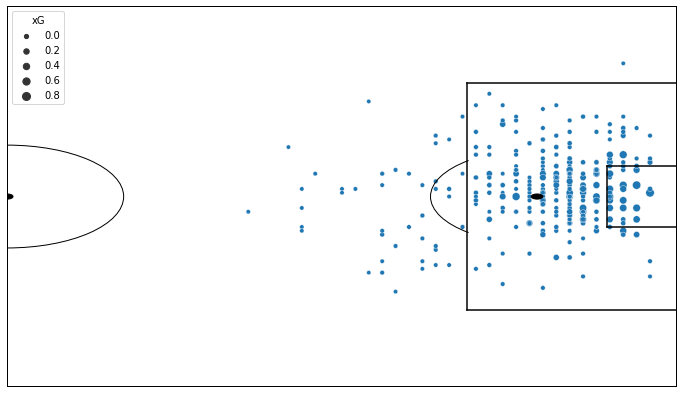

In [56]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Giroud"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

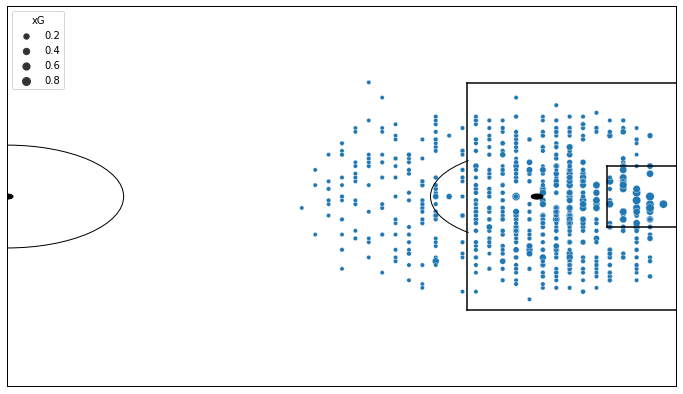

In [57]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Aguero"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

(0.0, 0.74)

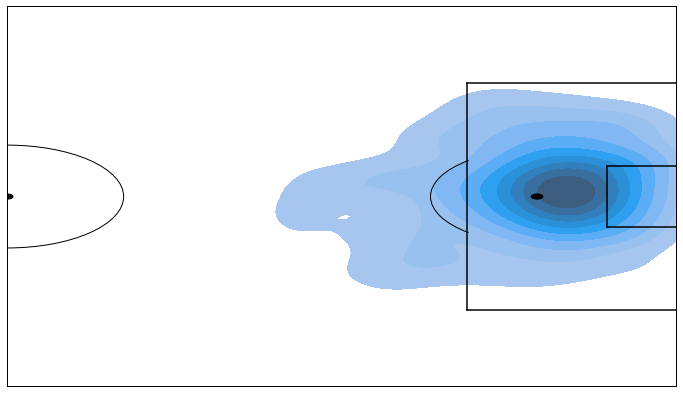

In [59]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Giroud"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

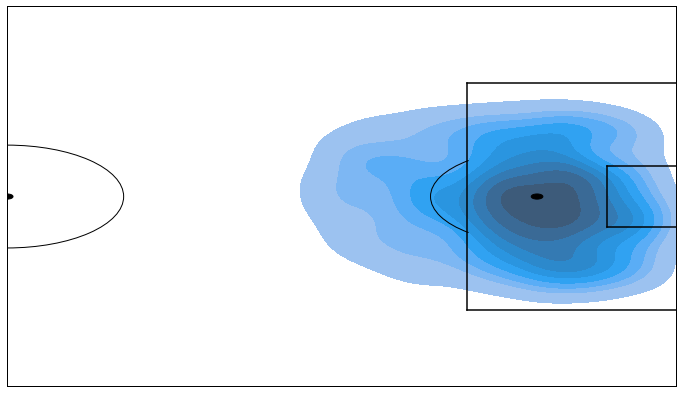

In [60]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Aguero"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

**PLOT HEATMAPS**

(0.0, 0.74)

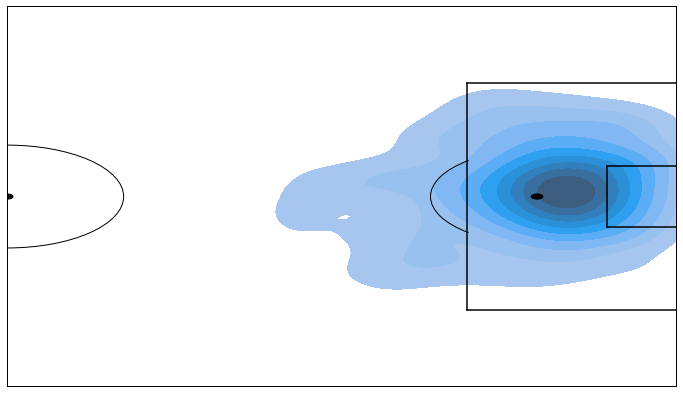

In [62]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Giroud"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

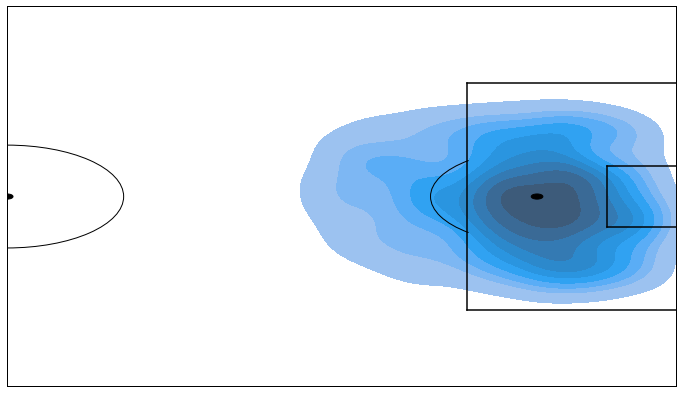

In [63]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Aguero"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

# **FINAL COMPARISON**

In [64]:
season_wise_meta_df



,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Giroud,Sub,17,4,29,750,5.07,0,1.18,6,2020,Chelsea,1,0,4,5.07,5.25,1.71
1,Giroud,Sub,18,8,39,1015,7.40,0,1.39,8,2019,Chelsea,1,0,8,7.40,9.75,2.36
2,Giroud,Sub,27,2,32,808,5.06,4,2.29,18,2018,Chelsea,1,0,2,5.06,7.71,2.78
3,Giroud,Sub,13,3,29,606,4.05,1,2.16,13,2017,Chelsea,0,0,3,4.05,6.08,0.76
4,Giroud,Sub,16,4,18,347,3.55,0,0.85,7,2017,Arsenal,0,0,4,3.55,4.61,0.88
5,Giroud,Sub,29,12,39,1170,7.00,3,2.01,17,2016,Arsenal,2,0,12,7.00,9.58,1.82
6,Giroud,FW,38,16,101,2411,14.50,6,5.76,36,2015,Arsenal,2,0,15,13.74,18.89,6.92
7,Giroud,Sub,27,14,70,1871,8.85,3,3.86,29,2014,Arsenal,5,1,14,8.85,13.64,4.13
0,Aguero,FW,12,4,19,556,3.72,1,1.32,7,2020,Manchester City,0,0,3,2.19,4.16,1.28
1,Aguero,Sub,24,16,76,1462,15.56,3,2.92,19,2019,Manchester City,1,0,14,13.27,16.88,2.64


In [65]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [66]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Aguero,188,132,714,13876,125.82,31,28.27,190,14119,15,1,110,105.25,145.40,35.37
1,Giroud,185,63,357,8978,55.48,17,19.50,134,16136,12,1,62,54.72,75.51,21.36


In [67]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [68]:
cols_for_radar = ['goals', 'shots', 'xG',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'xGChain', 'xGBuildup']

# **RADAR PLOT FOR COMPARISON ANALYSIS**

In [71]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Giroud"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name='Giroud'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Aguero"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Aguero"))
# Additional properties for the plot:
fig.update_layout(
    title="Giroud vs Aguero",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

# **Per90 STATS**

In [ ]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes',
             'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

In [72]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Giroud"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Giroud'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Aguero"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Aguero"))
# Additional properties for the plot:
fig.update_layout(
    title="Giroud vs Aguero",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

# **FINAL VERDICT? AGUERO WON!!**